In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [7]:
from google.colab import files
data_to_load = files.upload()

Saving music_sentiment_analysis.csv to music_sentiment_analysis.csv


In [9]:
data= pd.read_csv('music_sentiment_analysis.csv', skipinitialspace=True)

In [10]:
data.head(5)

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


### Baseline Model


In [11]:
X_baseline= data[['artist', 'genre']]

y_baseline= data['mood']

In [12]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
#one_hot_encoder.fit_transform(X_baseline)

In [15]:
names= one_hot_encoder.get_feature_names()

In [17]:
names= pd.Series(names)

In [18]:
names= names.apply(lambda x: x.split('_')[1])

In [ ]:
X_baseline= pd.DataFrame(one_hot_encoder.fit_transform(X_baseline))
X_baseline.columns= names
#X_baseline

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y_baseline, test_size=0.20, random_state=5)

In [104]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

In [106]:
y_pred=logreg.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       happy       0.55      0.52      0.54        84
         sad       0.67      0.69      0.68       116

    accuracy                           0.62       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0.62      0.62       200



In [ ]:
data.info()

### Check for Missing Values

In [26]:
for col in data:
    pct_missing= (data[col].isnull().sum())
    #print(pct_missing)
    print('{} - {}'.format(col, round(pct_missing)))

file - 0
artist - 0
title - 0
lyrics - 0
genre - 0
mood - 0
year - 0


In [27]:
data.artist.value_counts()

Rihanna                        7
Phil Collins                   7
Michael Jackson                6
Snow Patrol                    6
Nick Cave & The Bad Seeds      6
                              ..
The Notorious B.I.G.           1
Peter Tosh                     1
Orbital                        1
Future Leaders of the World    1
Cradle Of Filth                1
Name: artist, Length: 629, dtype: int64

In [28]:
data.genre.value_counts()

Rock           533
Hip Hop/Rap    105
Pop             82
Country         79
R&B             53
Christian       44
Electronic      40
Blues           24
Ska             17
Jazz            14
Soul             8
Dance            1
Name: genre, dtype: int64

In [29]:
data.title.value_counts()

Ring The Alarm                                       3
Hold On                                              3
Lost                                                 2
Joy In The Journey (The Final Word Album Version)    2
Good Girl Gone Bad                                   2
                                                    ..
New Sensation                                        1
I'll Sweat You (LP Version)                          1
Malice                                               1
Mean Machine (Remastered LP Version)                 1
Dying Batteries                                      1
Name: title, Length: 988, dtype: int64

### Rearranging the columns so target variable is our last column

In [30]:
data.columns.tolist()

['file', 'artist', 'title', 'lyrics', 'genre', 'mood', 'year']

In [31]:
data= data[['file', 'artist', 'title', 'lyrics', 'genre', 'year','mood']]

In [32]:
data.head(2)

,file,artist,title,lyrics,genre,year,mood
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,1994,sad
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,1982,happy


### Check for Class Imbalance

In [33]:
data.mood.value_counts()

sad      554
happy    446
Name: mood, dtype: int64

### Poltting the Target Variable

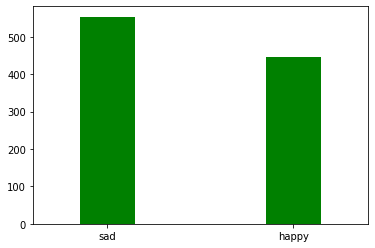

In [34]:
data['mood'].value_counts().plot.bar( rot=0, color="green", width=0.3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

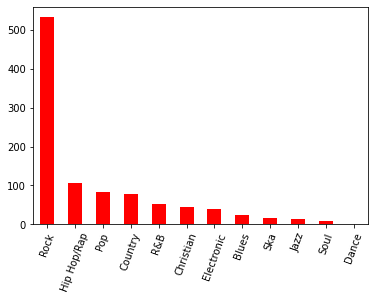

In [35]:
#data.genre.value_counts()
data['genre'].value_counts().plot.bar( rot=0, color="red", width=0.5)
plt.xticks(rotation=70)

In [36]:
happy_songs= data[data.mood=='happy']

In [37]:
sad_songs= data[data.mood=='sad']

In [38]:
# Splitting data into train & test

X= data.drop(['file','mood'], axis=1)
X.shape

(1000, 5)

In [39]:
y= data['mood']
y.shape

(1000,)

### Splitting Data into Train & Test Set

In [68]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [69]:
print(X_train.shape)

(800, 5)


In [70]:
print(X_test.shape)

(200, 5)


In [77]:

import spacy
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    #print(text)
    doc = nlp(text)
    #print(doc)
    return [token.lemma_ for token in doc if not token.is_stop and token.lemma_.isalpha()]

### Wordcloud for Happy Songs

(-0.5, 999.5, 599.5, -0.5)

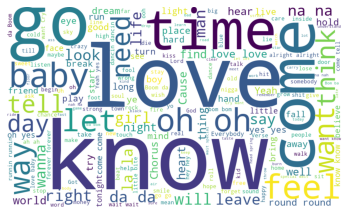

In [43]:
happy_lyrics = happy_songs.lyrics
#print(happy_lyrics)
happy_text = ""
for word in happy_lyrics:
    happy_text = happy_text + " ".join(preprocess(word))


wordcloud = WordCloud(background_color="white", width=1000, height=600, margin=1).generate(happy_text) #, collocations=False
plt.imshow(wordcloud)
plt.axis("off")
# plt.show()
#plt.savefig('happy.png')

### Wordcloud for Sad Songs

(-0.5, 999.5, 599.5, -0.5)

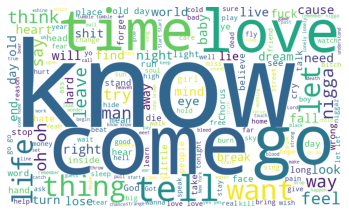

In [44]:
sad_lyrics = sad_songs.lyrics
#print(happy_lyrics)
sad_text = ""
for word in sad_lyrics:
    sad_text = sad_text + " ".join(preprocess(word))


wordcloud = WordCloud(background_color="white", width=1000, height=600, margin=1).generate(sad_text)
plt.imshow(wordcloud)
plt.axis("off")

### Model Building

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

### Map 'Happy' to 1 & 'Sad' to 0 to convert from categorical to numerical

In [71]:
y_train= y_train.map({'happy':1, 'sad':0})

In [72]:
y_test= y_test.map({'happy':1, 'sad':0})

In [ ]:
y_test
#y_train

# SVM Classifier

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

### Building Pipeline and initializing the hyperparameteres

In [84]:
pipeline_SVM = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', SVC(kernel= "linear")),
])

parameters_SVM = {
    'vectorizer__binary': (True, False),
    'vectorizer__ngram_range': ((1, 1),(1, 2)),
    'classifier__C': (0.1, 0.5, 0.8)
}

In [85]:
grid_SVM = GridSearchCV(pipeline_SVM, parameters_SVM, cv=2, n_jobs= -1, verbose=5)

In [ ]:
grid_SVM.fit(X_train["lyrics"], y_train)

In [87]:
preds= grid_SVM.predict(X_test["lyrics"])

### Confusion Matrix for SVM

Text(0.5, 15.0, 'Predicted label')

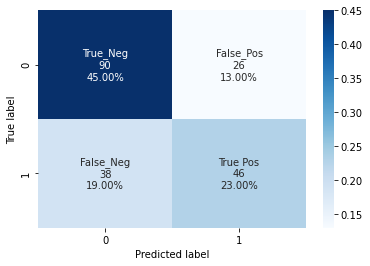

In [ ]:
cm = confusion_matrix(y_test, preds)
group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Evaluation Metrics for SVM

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       116
           1       0.64      0.55      0.59        84

    accuracy                           0.68       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.68      0.68      0.68       200



In [ ]:
print("best parameters:", grid_SVM.best_params_)

best parameters: {'classifier__C': 0.8, 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 1)}


In [88]:
decision_scores = grid_SVM.decision_function(X_test["lyrics"])
FPR_SVM, TPR_SVM, threshold_SVM = roc_curve(y_test, decision_scores)

print('AUC: {:.3f}%'.format(roc_auc_score(y_test, decision_scores)*100))

AUC: 71.470%


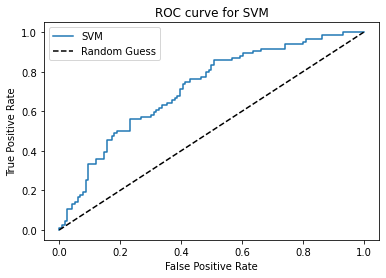

In [89]:
# roc curve
plt.plot(FPR_SVM, TPR_SVM, label='SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for SVM")
plt.savefig("ROC curve for SVM")

# XG Boost


In [90]:
import xgboost as xgb

### Building Pipeline and initializing the hyperparameteres

In [91]:
pipeline_XG_boost = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42))
])

parameters_XG_boost = {'vectorizer__binary': (True,False),
                       'vectorizer__ngram_range': ((1, 1),(1,2)),
                       'classifier__learning_rate': [0.1, 0.5],
                       'classifier__metric':['auc'],
                       'classifier__max_depth' : [4,6,8],
                       'classifier__boosting_type' : ['gbdt', 'dart', 'random_forest'],
}

In [92]:
grid = GridSearchCV(pipeline_XG_boost, parameters_XG_boost, cv=2, verbose=5, n_jobs=-1)

In [ ]:
grid.fit(X_train["lyrics"], y_train)

### Confusion Matrix for XG Boost

Text(0.5, 15.0, 'Predicted label')

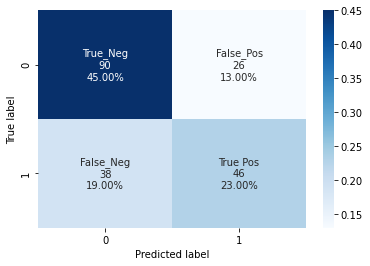

In [ ]:
cm = confusion_matrix(y_test, preds)

group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Evaluation Metrics for XG Boost

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       116
           1       0.64      0.55      0.59        84

    accuracy                           0.68       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.68      0.68      0.68       200



In [ ]:
print("best parameters:", grid.best_params_)

best parameters: {'classifier__boosting_type': 'gbdt', 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__metric': 'auc', 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 2)}


In [94]:
predicted_prob = grid.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_XG, true_pos_rate_XG, threshold_XG = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}'.format(roc_auc_score(y_test, predicted_prob)))

AUC: 0.713


### Multi Layer Perceptron/ Feed Forward Neural Network

In [ ]:
MLPClassifier().get_params()

In [95]:
from sklearn.neural_network import MLPClassifier

In [97]:
pipeline_MLP = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', MLPClassifier(max_iter = 500, 
                                 ))
])


parameters_MLP = {
    'vectorizer__binary': (True,False),
    'vectorizer__ngram_range': ((1, 1),(1,2)),
    'classifier__hidden_layer_sizes': [(32),(32,64)],
    'classifier__batch_size':[20, 40, 80],
    'classifier__activation': ['relu', 'tanh', 'sigmoid'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__learning_rate_init': [0.001, 0.01, 0.05, 0.1],
}

In [98]:
grid_MLP = GridSearchCV(pipeline_MLP, parameters_MLP, cv=2, n_jobs=-1)

In [ ]:
grid_MLP.fit(X_train["lyrics"], y_train)

In [ ]:
print("best parameters:", grid_MLP.best_params_)

best parameters: {'classifier__activation': 'relu', 'classifier__batch_size': 20, 'classifier__hidden_layer_sizes': 32, 'classifier__learning_rate_init': 0.001, 'classifier__solver': 'adam', 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 2)}


Text(0.5, 15.0, 'Predicted label')

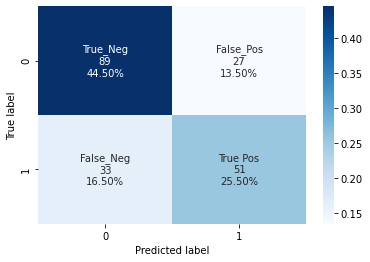

In [ ]:
preds= grid_MLP.predict(X_test["lyrics"])
cm = confusion_matrix(y_test, preds)

group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       116
           1       0.65      0.61      0.63        84

    accuracy                           0.70       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.70      0.70       200



In [100]:
#pipeline_MLP.predict_proba(X_test["lyrics"])

predicted_prob = grid_MLP.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_MLP, true_pos_rate_MLP, threshold_MLP = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}'.format(roc_auc_score(y_test, predicted_prob)*100))

AUC: 72.691


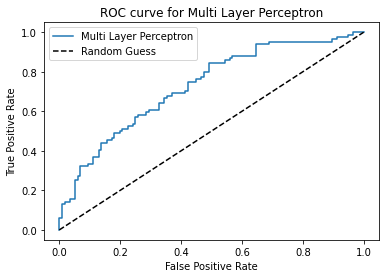

In [101]:
plt.plot(false_pos_rate_MLP, true_pos_rate_MLP, label='Multi Layer Perceptron')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for Multi Layer Perceptron")
plt.savefig("ROC curve for Multi Layer Perceptron")

## ROC Curves for all three models

Text(0.5, 1.0, 'ROC curve')

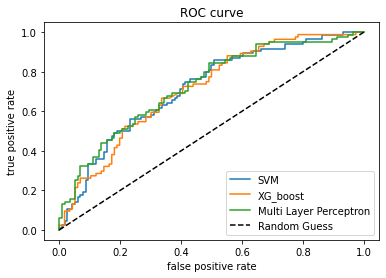

In [102]:
plt.plot(FPR_SVM, TPR_SVM, label='SVM')
#plt.plot(false_pos_rate_NB, true_pos_rate_NB, label='Naive Bayes')
#plt.plot(false_pos_rate_log, true_pos_rate_log, label='Logistic Regression')
plt.plot(false_pos_rate_XG, true_pos_rate_XG, label='XG_boost')
plt.plot(false_pos_rate_MLP, true_pos_rate_MLP, label='Multi Layer Perceptron')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")